In [1]:
import pandas as pd
import numpy as np
# 한글 표시 코드
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')
# 통계 검증 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

In [4]:
df1 = pd.read_csv('df2.csv', encoding = 'ansi')
data = df1.copy()

In [51]:
data.head()

,BMI,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,혈색소,(혈청지오티)ALT,감마지티피,요단백,흡연상태,cluster
0,60.0,79.5,110.0,60.0,96.0,195.911052,12.8,8.0,12.0,1.0,1.0,0
1,55.0,69.3,128.0,78.0,79.0,195.911052,15.9,45.0,47.0,1.0,1.0,3
2,45.0,71.5,151.0,89.0,100.0,234.000000,12.7,10.0,13.0,1.0,1.0,1
3,50.0,77.0,114.0,62.0,124.0,195.911052,11.6,26.0,12.0,1.0,1.0,0
4,50.0,75.0,136.0,83.0,97.0,195.911052,13.1,21.0,27.0,1.0,1.0,1


In [52]:
data.groupby('cluster').mean()


,BMI,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,혈색소,(혈청지오티)ALT,감마지티피,요단백,흡연상태
cluster,,,,,,,,,,,
0,53.433039,72.631644,109.578619,67.637136,90.665905,195.137787,13.337997,15.774764,16.909703,1.022994,1.215223
1,59.126767,80.181356,129.680709,79.984498,97.952361,196.431614,13.665861,19.002553,20.638587,1.003628,1.155624
2,61.878786,80.635393,122.430230,75.454496,96.448729,194.200455,14.130951,20.060796,23.760825,2.751825,1.488080
3,71.272416,85.947444,123.022501,76.819237,97.684986,195.985965,15.346844,26.227548,33.066254,1.017908,2.142024


- 일원분산분석

가설1 : 군집별로 허리둘레에 차이가 있을 것이다. anova 검정

In [53]:
group1 = data[data['cluster'] == 0]
group2 = data[data['cluster'] == 1]
group3 = data[data['cluster'] == 2]
group4 = data[data['cluster'] == 3]

In [54]:
group1_waist = group1[['허리둘레']].values
group2_waist = group2[['허리둘레']].values
group3_waist = group3[['허리둘레']].values
group4_waist = group4[['허리둘레']].values

In [55]:
plt.rcParams["figure.figsize"] = (14,4)


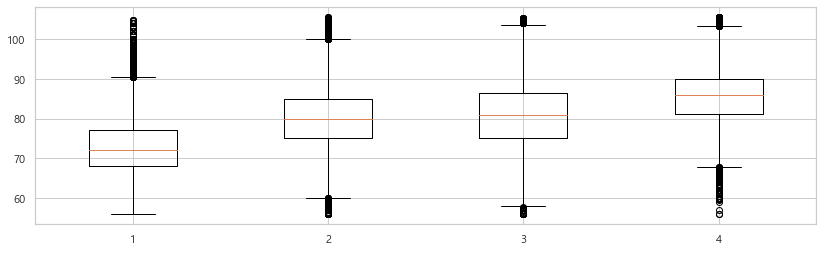

In [57]:
# matplotlib plotting
plot_data = [group1_waist, group2_waist, group3_waist,group4_waist]
ax = plt.boxplot(plot_data)
plt.show()

In [64]:
F_statistic, pVal = stats.f_oneway(group1_waist, group2_waist, group3_waist)

print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic[0], pVal[0]))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹간 허리둘레의 평균이 통계적으로 유의미하게 차이난다.')

데이터의 일원분산분석 결과 : F=70257.9, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹간 허리둘레의 평균이 통계적으로 유의미하게 차이난다.


In [59]:
df=data[['허리둘레', 'cluster']]

In [60]:
# 같은 결과를 다른 패키지를 활용해서 도출, 표형태로 출력됨
df=data[['허리둘레', 'cluster']]

model = ols('허리둘레 ~ C(cluster)', df).fit()

print(anova_lm(model))

                  df        sum_sq       mean_sq              F  PR(>F)
C(cluster)       3.0  2.199579e+07  7.331932e+06  151314.389292     0.0
Residual    735520.0  3.563959e+07  4.845495e+01            NaN     NaN


- 가설2 : 군집간 수축기혈압에 차이가 있을 것이다.

In [65]:
group1_SBP = group1[['수축기혈압']].values
group2_SBP = group2[['수축기혈압']].values
group3_SBP = group3[['수축기혈압']].values
group4_SBP = group4[['수축기혈압']].values

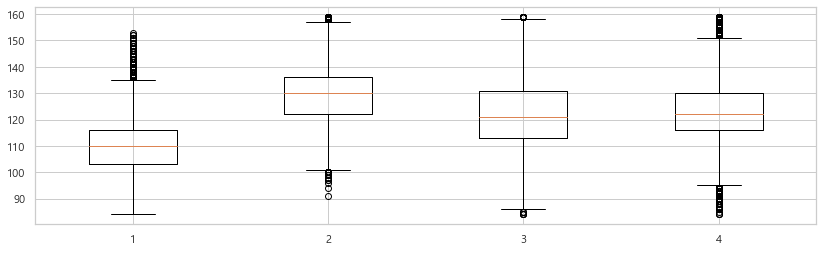

In [67]:
# matplotlib plotting
plot_data = [group1_SBP, group2_SBP, group3_SBP,group4_SBP]
ax = plt.boxplot(plot_data)
plt.show()

In [69]:
F_statistic, pVal = stats.f_oneway(group1_SBP, group2_SBP, group3_SBP, group4_SBP)

print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic[0], pVal[0]))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹간 수축기혈압의 평균이 통계적으로 유의미하게 차이난다.')

데이터의 일원분산분석 결과 : F=161643.9, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹간 수축기혈압의 평균이 통계적으로 유의미하게 차이난다.


- 가설3 : 군집간 이완기혈압에 차이가 있을 것이다.

In [70]:
group1_DBP = group1[['이완기혈압']].values
group2_DBP = group2[['이완기혈압']].values
group3_DBP = group3[['이완기혈압']].values
group4_DBP = group4[['이완기혈압']].values

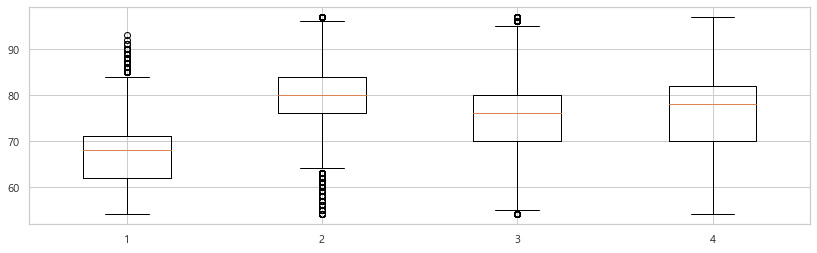

In [71]:
# matplotlib plotting
plot_data = [group1_DBP, group2_DBP, group3_DBP,group4_DBP]
ax = plt.boxplot(plot_data)
plt.show()

In [72]:
F_statistic, pVal = stats.f_oneway(group1_DBP, group2_DBP, group3_DBP)

print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic[0], pVal[0]))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹간 이완기혈압의 평균이 통계적으로 유의미하게 차이난다.')

데이터의 일원분산분석 결과 : F=206193.3, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹간 이완기혈압의 평균이 통계적으로 유의미하게 차이난다.


- 가설4 : 군집간 식전혈당에 차이가 있을 것이다.

In [18]:
data.head(2)

,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,혈색소,(혈청지오티)ALT,감마지티피,요단백,흡연상태,cluster
0,79.5,110.0,60.0,96.0,195.911052,12.8,8.0,12.0,1.0,1.0,0
1,69.3,128.0,78.0,79.0,195.911052,15.9,45.0,47.0,1.0,1.0,2


In [73]:
group1_FBS = group1[['식전혈당(공복혈당)']].values
group2_FBS = group2[['식전혈당(공복혈당)']].values
group3_FBS = group3[['식전혈당(공복혈당)']].values
group4_FBS = group4[['식전혈당(공복혈당)']].values

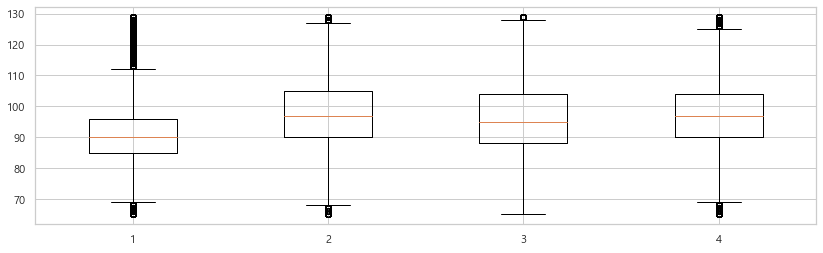

In [75]:
# matplotlib plotting
plot_data = [group1_FBS, group2_FBS, group3_FBS, group4_FBS]
ax = plt.boxplot(plot_data)
plt.show()

In [76]:
F_statistic, pVal = stats.f_oneway(group1_FBS, group2_FBS, group3_FBS)

print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic[0], pVal[0]))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹간 공복혈당의 평균이 통계적으로 유의미하게 차이난다.')

데이터의 일원분산분석 결과 : F=29603.4, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹간 공복혈당의 평균이 통계적으로 유의미하게 차이난다.


- 가설5 : 군집간 총콜레스테롤에 차이가 있을 것이다.

In [22]:
data.head(2)

,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,혈색소,(혈청지오티)ALT,감마지티피,요단백,흡연상태,cluster
0,79.5,110.0,60.0,96.0,195.911052,12.8,8.0,12.0,1.0,1.0,0
1,69.3,128.0,78.0,79.0,195.911052,15.9,45.0,47.0,1.0,1.0,2


In [77]:
group1_TC = group1[['총콜레스테롤']].values
group2_TC = group2[['총콜레스테롤']].values
group3_TC = group3[['총콜레스테롤']].values
group4_TC = group4[['총콜레스테롤']].values

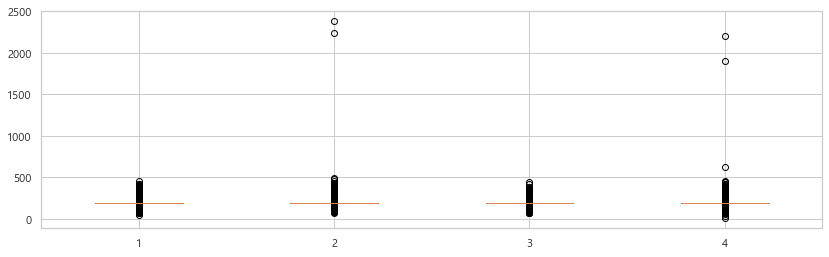

In [78]:
# matplotlib plotting
plot_data = [group1_TC, group2_TC, group3_TC, group4_TC]
ax = plt.boxplot(plot_data)
plt.show()

In [79]:
F_statistic, pVal = stats.f_oneway(group1_TC, group2_TC, group3_TC)

print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic[0], pVal[0]))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹간 총콜레스테롤의 평균이 통계적으로 유의미하게 차이난다.')

데이터의 일원분산분석 결과 : F=263.8, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹간 총콜레스테롤의 평균이 통계적으로 유의미하게 차이난다.


- 가설6 : 군집간 혈색소의 평균에 차이가 있을 것이다.

In [26]:
data.head(2)

,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,혈색소,(혈청지오티)ALT,감마지티피,요단백,흡연상태,cluster
0,79.5,110.0,60.0,96.0,195.911052,12.8,8.0,12.0,1.0,1.0,0
1,69.3,128.0,78.0,79.0,195.911052,15.9,45.0,47.0,1.0,1.0,2


In [80]:
group1_hemo = group1[['혈색소']].values
group2_hemo = group2[['혈색소']].values
group3_hemo = group3[['혈색소']].values
group4_hemo = group4[['혈색소']].values

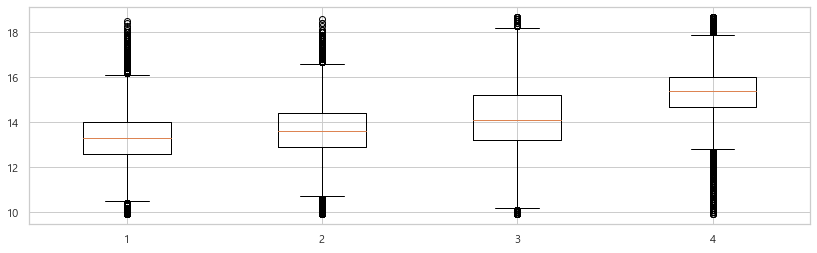

In [81]:
# matplotlib plotting
plot_data = [group1_hemo, group2_hemo, group3_hemo,group4_hemo]
ax = plt.boxplot(plot_data)
plt.show()

In [82]:
F_statistic, pVal = stats.f_oneway(group1_hemo, group2_hemo, group3_hemo, group4_hemo)

print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic[0], pVal[0]))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹간 혈색소의 평균이 통계적으로 유의미하게 차이난다.')

데이터의 일원분산분석 결과 : F=143985.0, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹간 혈색소의 평균이 통계적으로 유의미하게 차이난다.


- 가설7 : 군집간 혈청지오티의 평균에 차이가 있을 것이다.

In [30]:
data.head(2)

,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,혈색소,(혈청지오티)ALT,감마지티피,요단백,흡연상태,cluster
0,79.5,110.0,60.0,96.0,195.911052,12.8,8.0,12.0,1.0,1.0,0
1,69.3,128.0,78.0,79.0,195.911052,15.9,45.0,47.0,1.0,1.0,2


In [83]:
group1_ALT = group1[['(혈청지오티)ALT']].values
group2_ALT = group2[['(혈청지오티)ALT']].values
group3_ALT = group3[['(혈청지오티)ALT']].values
group4_ALT = group4[['(혈청지오티)ALT']].values

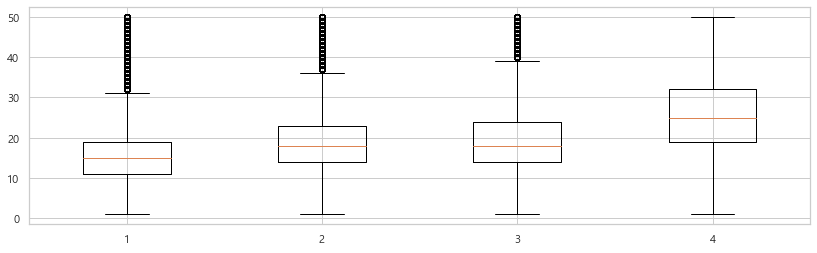

In [85]:
# matplotlib plotting
plot_data = [group1_ALT, group2_ALT, group3_ALT,group4_ALT]
ax = plt.boxplot(plot_data)
plt.show()

In [86]:
F_statistic, pVal = stats.f_oneway(group1_ALT, group2_ALT, group3_ALT, group4_ALT)

print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic[0], pVal[0]))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹간 혈청지오티 평균이 통계적으로 유의미하게 차이난다.')

데이터의 일원분산분석 결과 : F=78616.4, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹간 혈청지오티 평균이 통계적으로 유의미하게 차이난다.


- 가설8 : 군집간 감마지티피의 평균에 차이가 있을 것이다.

In [87]:
data.head(2)

,BMI,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,혈색소,(혈청지오티)ALT,감마지티피,요단백,흡연상태,cluster
0,60.0,79.5,110.0,60.0,96.0,195.911052,12.8,8.0,12.0,1.0,1.0,0
1,55.0,69.3,128.0,78.0,79.0,195.911052,15.9,45.0,47.0,1.0,1.0,3


In [88]:
group1_GTP = group1[['감마지티피']].values
group2_GTP = group2[['감마지티피']].values
group3_GTP = group3[['감마지티피']].values
group4_GTP = group4[['감마지티피']].values

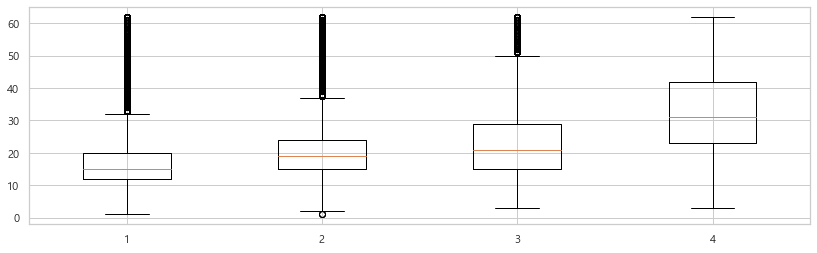

In [89]:
# matplotlib plotting
plot_data = [group1_GTP, group2_GTP, group3_GTP,group4_GTP]
ax = plt.boxplot(plot_data)
plt.show()

In [90]:
F_statistic, pVal = stats.f_oneway(group1_GTP, group2_GTP, group3_GTP,group4_GTP)

print('데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic[0], pVal[0]))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹간 감마지티피 평균이 통계적으로 유의미하게 차이난다.')

데이터의 일원분산분석 결과 : F=119818.2, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹간 감마지티피 평균이 통계적으로 유의미하게 차이난다.


- 가설9 : 군집간 요단백에 차이가 있을 것이다. -> 카이스퀘어 분석

In [91]:
pd.crosstab(df1['요단백'],df1['cluster'])

cluster,0,1,2,3
요단백,,,,
1.0,242278,216422,0,240198
2.0,5702,788,11794,4380
3.0,0,0,9910,0
4.0,0,0,2948,0
5.0,0,0,858,0
6.0,0,0,246,0


In [96]:
a=np.array([[242278, 216422,0, 240198], 
            [5702, 788, 11794, 4380], 
            [0,0, 9910, 0],
            [0, 0, 2948, 0],
            [0, 0, 858, 0],
            [0, 0, 246,0]])

In [97]:
chi = sp.stats.chi2_contingency(a)


In [98]:
print('데이터의 카이제곱 분석결과 : 검정통계량 = {0:.1f}, p = {1:5f}'.format(chi[0], chi[1]))
if chi[1] < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹간 요단백의 차이가 있다.')

데이터의 카이제곱 분석결과 : 검정통계량 = 569664.1, p = 0.000000
P-value 값이 충분히 작음으로 인해 그룹간 요단백의 차이가 있다.


- 가설10 : 군집간 흡연상태에 차이가 있을 것이다. -> 카이스퀘어 분석

In [99]:
pd.crosstab(df1['흡연상태'],df1['cluster'])

cluster,0,1,2,3
흡연상태,,,,
1.0,213028,190237,17169,66675
2.0,16533,20143,4603,76492
3.0,18419,6830,3984,101411


In [104]:
a=np.array([[213028, 190237,17169, 66675], [16533, 20143, 4603, 76492], [18419, 6830, 3984, 101411]])

In [105]:
chi = sp.stats.chi2_contingency(a)


In [106]:
print('데이터의 카이제곱 분석결과 : 검정통계량 = {0:.1f}, p = {1:5f}'.format(chi[0], chi[1]))
if chi[1] < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹간 흡연상태의 차이가 있다.')

데이터의 카이제곱 분석결과 : 검정통계량 = 259326.2, p = 0.000000
P-value 값이 충분히 작음으로 인해 그룹간 흡연상태의 차이가 있다.
